<a href="https://colab.research.google.com/github/SarahSouzaPontes/LH_CD_SARAH_SOUZA_PONTES_regressao/blob/main/LH_CD_SARAH_SOUZA_PONTES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Resolução de Problema*** </br>

######Você foi alocado(a) em um time da Indicium que está trabalhando atualmente junto a um cliente que o core business é compra e venda de veículos usados. Essa empresa está com dificuldades na área de revenda dos automóveis usados em seu catálogo. </br>
Para resolver esse problema, a empresa comprou uma base de dados de um marketplace de compra e venda para entender melhor o mercado nacional, de forma a conseguir precificar o seu catálogo de forma mais competitiva e assim recuperar o mau desempenho neste setor.</br>
Seu objetivo é analisar os dados para responder às perguntas de negócios feitas pelo cliente e criar um modelo preditivo que precifique os carros do cliente de forma que eles fiquem o mais próximos dos valores de mercado. #######

###### Irei analisar a base de dados do marketplace de compra e venda de carros e responder às perguntas de negócios com insights relevantes. Além disso, desenvolverei um modelo preditivo que permita precificar os carros do cliente de forma mais competitiva, buscando se aproximar dos valores de mercado.</br>

Aqui estão as etapas gerais que irei seguir para abordar o problema:</br>

Análise exploratória dos dados: Primeiramente, farei uma exploração detalhada da base de dados do marketplace. Isso envolverá a compreensão dos diferentes atributos disponíveis, a identificação de quais informações são mais relevantes para a precificação e a verificação da qualidade dos dados.</br>

Identificação de padrões e insights de negócios: Com a análise exploratória, buscarei identificar padrões, tendências e insights relevantes que possam ser úteis para a empresa cliente. Isso inclui a compreensão das preferências do mercado, fatores que influenciam os preços dos veículos usados, sazonalidade, entre outros.</br>

Precificação competitiva: Com base nos insights obtidos, desenvolverei um modelo preditivo que leve em consideração os atributos relevantes para a precificação de veículos usados. O objetivo é criar um modelo que possa ajudar a empresa cliente a definir preços mais competitivos, alinhados com o mercado, a fim de impulsionar as vendas e melhorar o desempenho.</br>

Avaliação do modelo: Após criar o modelo preditivo, é importante avaliá-lo adequadamente para garantir sua eficácia e precisão na precificação dos carros. Utilizarei métricas apropriadas para medir o desempenho do modelo e, se necessário, farei ajustes para otimizar seus resultados.</br>

Implementação e suporte: Com o modelo desenvolvido e avaliado, o próximo passo é implementá-lo na empresa cliente. Além disso, estarei disponível para fornecer suporte contínuo, caso surjam dúvidas ou seja necessário ajustar o modelo com base no feedback e nas mudanças do mercado ao longo do tempo.</br>

Vale ressaltar que, para obter resultados mais precisos e confiáveis, é fundamental trabalhar em estreita colaboração com a equipe do cliente, compartilhar informações e feedbacks constantemente. Além disso, a proteção e privacidade dos dados serão rigorosamente respeitadas ao longo de todo o processo.</br>

Com esse plano de ação, esperamos ajudar a empresa cliente a melhorar a revenda de veículos usados e alcançar resultados mais positivos nesse setor.


In [167]:
#conexão com o google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


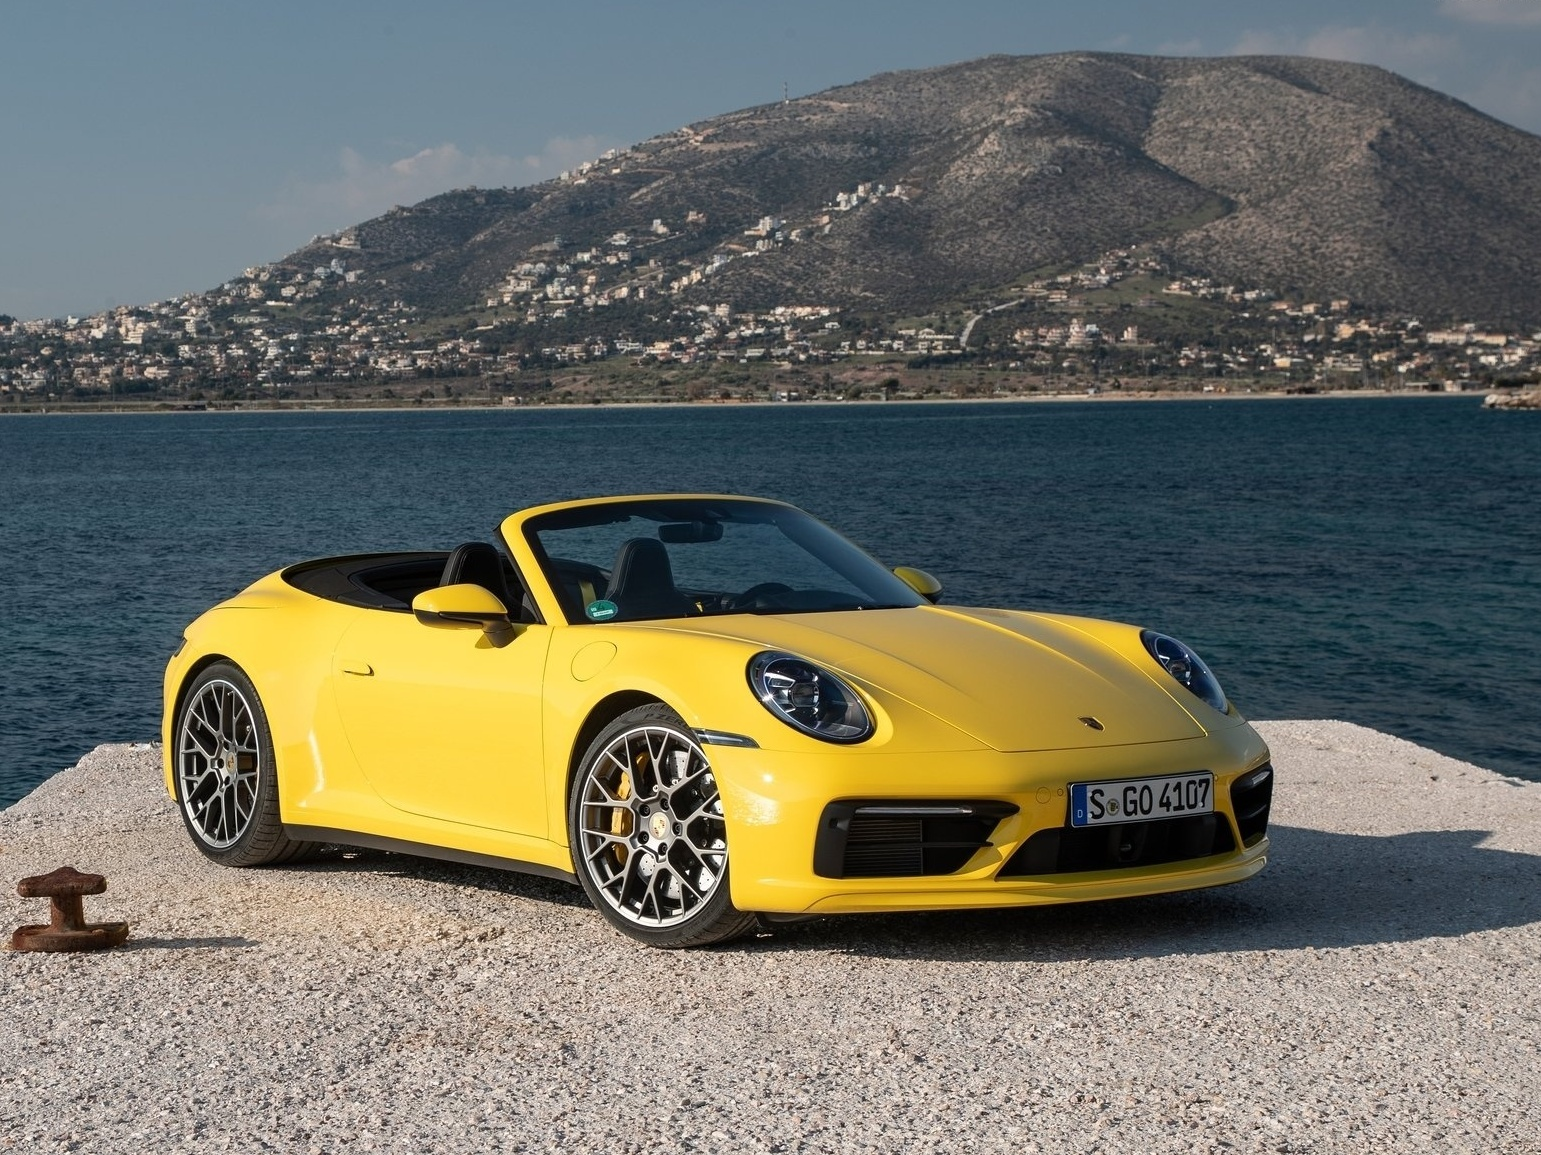

In [168]:
#importando bibliotecas
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# #caminho da imagem
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/carros.jpg')
cv2_imshow(img)

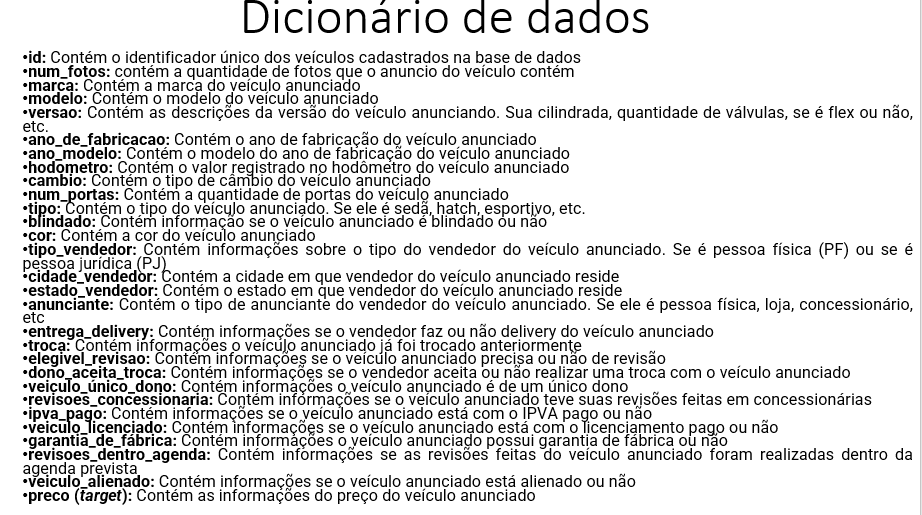

In [169]:
# #caminho da imagem
img1 = cv2.imread('/content/drive/MyDrive/Dicionario_dados.PNG')
cv2_imshow(img1)

In [170]:
'''
Importação dos módulos e funções
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import homogeneity_completeness_v_measure
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
import warnings
import seaborn as sns
import imblearn
from scipy import stats
from yellowbrick.cluster import KElbowVisualizer
import missingno as msno
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set()


1.Análise Estatística e EDA:</br>
a) Estatísticas Descritivas:</br>


Para cada variável (feature) numérica, calcule as principais estatísticas descritivas, como média, mediana, desvio padrão, mínimo, máximo e quartis. Isso ajudará a entender a distribuição e a dispersão dos dados.





In [260]:
'''
Carregando os arquivos .csv como panda dataframe
'''
train= pd.read_excel("/content/drive/MyDrive/train.xlsx")
train

id  num_fotos       marca   modelo  \
0      3.007162e+38        8.0      NISSAN    KICKS   
1      2.796398e+38        8.0        JEEP  COMPASS   
2      5.641446e+37       16.0         KIA  SORENTO   
3      5.686251e+37       14.0  VOLKSWAGEN   AMAROK   
4      3.389810e+38        8.0   SSANGYONG  KORANDO   
...             ...        ...         ...      ...   
29579  4.098508e+37        8.0      TOYOTA    HILUX   
29580  1.646632e+38        8.0  VOLKSWAGEN     POLO   
29581  1.708663e+38        8.0      TOYOTA    HILUX   
29582  2.089097e+38        8.0     PEUGEOT     2008   
29583  1.717814e+38       14.0        AUDI       Q7   

                                                  versao  ano_de_fabricacao  \
0                        1.6 16V FLEXSTART SL 4P XTRONIC               2017   
1                        2.0 16V FLEX LIMITED AUTOMÁTICO               2017   
2                  2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO               2018   
3      2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...               2013   
4             2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO               2013   
...                                                  ...                ...   
29579        2.8 D-4D TURBO DIESEL CD SRX 4X4 AUTOMÁTICO               2021   
29580                    1.0 200 TSI HIGHLINE AUTOMÁTICO               2020   
29581            2.8 SRX 4X4 CD 16V DIESEL 4P AUTOMÁTICO               2019   
29582             1.6 16V FLEX ALLURE PACK 4P AUTOMÁTICO               2021   
29583     3.0 TFSI AMBIENTE V6 24V GASOLINA 4P TIPTRONIC               2016   

       ano_modelo  hodometro      cambio  num_portas  ... elegivel_revisao  \
0          2017.0    67772.0         CVT           4  ...            False   
1          2017.0    62979.0  Automática           4  ...            False   
2          2019.0    44070.0  Automática           4  ...            False   
3          2015.0    85357.0  Automática           4  ...            False   
4          2015.0    71491.0  Automática           4  ...            False   
...           ...        ...         ...         ...  ...              ...   
29579      2021.0     8150.0  Automática           4  ...            False   
29580      2020.0    17987.0  Automática           4  ...            False   
29581      2019.0    44742.0  Automática           4  ...            False   
29582      2022.0    35376.0  Automática           4  ...            False   
29583      2017.0    90433.0  Automática           4  ...            False   

      dono_aceita_troca veiculo_único_dono  \
0                   NaN                NaN   
1          Aceita troca                NaN   
2          Aceita troca                NaN   
3          Aceita troca                NaN   
4                   NaN                NaN   
...                 ...                ...   
29579      Aceita troca         Único dono   
29580               NaN         Único dono   
29581      Aceita troca                NaN   
29582      Aceita troca         Único dono   
29583      Aceita troca                NaN   

                            revisoes_concessionaria  ipva_pago  \
0      Todas as revisões feitas pela concessionária  IPVA pago   
1                                               NaN  IPVA pago   
2                                               NaN        NaN   
3                                               NaN  IPVA pago   
4      Todas as revisões feitas pela concessionária        NaN   
...                                             ...        ...   
29579                                           NaN  IPVA pago   
29580  Todas as revisões feitas pela concessionária  IPVA pago   
29581                                           NaN        NaN   
29582                                           NaN  IPVA pago   
29583                                           NaN        NaN   

      veiculo_licenciado  garantia_de_fábrica  \
0             Licenciado                  NaN   
1                    NaN  

In [173]:
#Analise descritiva (preliminar) automatizada
train['modelo'] = train['modelo'].astype(str)
train['modelo'] = pd.to_numeric(train['modelo'], errors='coerce')
import pandas as pd
!pip install sweetviz

import sweetviz as sv

# Caminho para o arquivo Excel
train_path = "/content/drive/MyDrive/train.xlsx"

# Carregar os dados do arquivo Excel
train = pd.read_excel(train_path)

# Converter a coluna "modelo" para uma string
train['modelo'] = train['modelo'].astype(str)

# Gerar o relatório com o Sweetviz
report = sv.analyze(train)

# Salvar o relatório em HTML
report.show_html("/content/drive/MyDrive/relatorio_sweetviz.html")

print("Relatório Sweetviz salvo em HTML com sucesso.")



                                             |          | [  0%]   00:00 -> (? left)

Report /content/drive/MyDrive/relatorio_sweetviz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
Relatório Sweetviz salvo em HTML com sucesso.


In [174]:
!pip install pdfkit
import pandas as pd
import sweetviz as sv
import pdfkit

# Caminho para o arquivo Excel
train_path = "/content/drive/MyDrive/train.xlsx"

# Carregar os dados do arquivo Excel
train = pd.read_excel(train_path)

# Converter a coluna "modelo" para uma string
train['modelo'] = train['modelo'].astype(str)

# Gerar o relatório com o Sweetviz
report = sv.analyze(train)

# Salvar o relatório em HTML
html_path = "/content/drive/MyDrive/relatorio_sweetviz.html"
report.show_html(html_path)

print("Relatório Sweetviz gerado.")


                                             |          | [  0%]   00:00 -> (? left)

Report /content/drive/MyDrive/relatorio_sweetviz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
Relatório Sweetviz gerado.


In [175]:
train.describe()

id     num_fotos  ano_de_fabricacao    ano_modelo  \
count  2.958400e+04  29407.000000       29584.000000  29584.000000   
mean   1.705650e+38     10.323834        2016.758552   2017.808985   
std    9.814219e+37      3.487334           4.062422      2.673930   
min    1.332604e+34      8.000000        1985.000000   1997.000000   
25%    8.617510e+37      8.000000        2015.000000   2016.000000   
50%    1.706531e+38      8.000000        2018.000000   2018.000000   
75%    2.554710e+38     14.000000        2019.000000   2020.000000   
max    3.402560e+38     21.000000        2022.000000   2023.000000   

           hodometro    num_portas  veiculo_alienado         preco  
count   29584.000000  29584.000000               0.0  2.958400e+04  
mean    58430.592077      3.940677               NaN  1.002299e+16  
std     32561.769309      0.338360               NaN  9.547504e+15  
min       100.000000      2.000000               NaN  2.006292e+10  
25%     31214.000000      4.000000               NaN  3.196583e+15  
50%     57434.000000      4.000000               NaN  8.244891e+15  
75%     81953.500000      4.000000               NaN  1.342533e+16  
max    390065.000000      4.000000               NaN  6.549912e+16

In [176]:
test= pd.read_excel("/content/drive/MyDrive/test.xlsx")
test

id  num_fotos      marca    modelo  \
0     1.351878e+37        8.0     NISSAN     VERSA   
1     2.998962e+38       18.0       FIAT    STRADA   
2     3.161806e+38        8.0       AUDI        Q5   
3     2.225272e+38       16.0  CHEVROLET     CRUZE   
4     1.604603e+38        8.0       FORD  ECOSPORT   
...            ...        ...        ...       ...   
9857  2.705310e+38        8.0     TOYOTA   COROLLA   
9858  3.544423e+37       17.0     TOYOTA     HILUX   
9859  1.519276e+38        8.0  CHEVROLET   TRACKER   
9860  1.180478e+38        9.0    PEUGEOT      2008   
9861  3.327850e+38        8.0     TOYOTA     HILUX   

                                       versao  ano_de_fabricacao  ano_modelo  \
0            1.6 16V FLEXSTART V-DRIVE MANUAL               2021      2021.0   
1        1.4 MPI WORKING CS 8V FLEX 2P MANUAL               2021      2021.0   
2            2.0 TFSI GASOLINA BLACK S TRONIC               2018      2019.0   
3         1.4 TURBO LT 16V FLEX 4P AUTOMÁTICO               2019      2020.0   
4               1.5 TI-VCT FLEX SE AUTOMÁTICO               2019      2019.0   
...                                       ...                ...         ...   
9857     1.8 GLI UPPER 16V FLEX 4P AUTOMÁTICO               2017      2018.0   
9858  2.8 SRV 4X4 CD 16V DIESEL 4P AUTOMÁTICO               2017      2017.0   
9859             1.0 TURBO FLEX LT AUTOMÁTICO               2020      2021.0   
9860   1.6 16V FLEX ALLURE PACK 4P AUTOMÁTICO               2018      2018.0   
9861  2.8 SRX 4X4 CD 16V DIESEL 4P AUTOMÁTICO               2019      2020.0   

      hodometro      cambio  num_portas  ...  troca elegivel_revisao  \
0       20258.0      Manual           4  ...  False            False   
1       53045.0      Manual           2  ...  False            False   
2       32486.0  Automática           4  ...  False            False   
3       24937.0  Automática           4  ...  False            False   
4       62074.0  Automática           4  ...  False            False   
...         ...         ...         ...  ...    ...              ...   
9857    44943.0         CVT           4  ...  False            False   
9858    44316.0  Automática           4  ...  False            False   
9859    21587.0  Automática           4  ...  False            False   
9860    54084.0  Automática           4  ...  False            False   
9861    32511.0  Automática           4  ...  False            False   

     dono_aceita_troca veiculo_único_dono  \
0         Aceita troca                NaN   
1         Aceita troca         Único dono   
2         Aceita troca                NaN   
3         Aceita troca         Único dono   
4         Aceita troca                NaN   
...                ...                ...   
9857               NaN                NaN   
9858      Aceita troca                NaN   
9859               NaN         Único dono   
9860      Aceita troca         Único dono   
9861      Aceita troca                NaN   

                           revisoes_concessionaria  ipva_pago  \
0                                              NaN  IPVA pago   
1                                              NaN  IPVA pago   
2                                              NaN  IPVA pago   
3                                              NaN  IPVA pago   
4                                              NaN  IPVA pago   
...                                            ...        ...   
9857                                           NaN  IPVA pago   
9858                                           NaN        NaN   
9859  Todas as revisões feitas pela concessionária  IPVA pago   
9860                                           NaN  IPVA pago   
9861  Todas as revisões feitas pela concessionária        NaN   

     veiculo_licenciado  garantia_de_fábrica  revisoes_dentro_agenda  \
0            Licenciado  Garantia de fábrica                     NaN   
1            Licenciado                  NaN                     NaN   
2  

In [177]:
for i, column_name in enumerate(train.columns):
    print(f"Column {i}: {column_name}")

Column 0: id
Column 1: num_fotos
Column 2: marca
Column 3: modelo
Column 4: versao
Column 5: ano_de_fabricacao
Column 6: ano_modelo
Column 7: hodometro
Column 8: cambio
Column 9: num_portas
Column 10: tipo
Column 11: blindado
Column 12: cor
Column 13: tipo_vendedor
Column 14: cidade_vendedor
Column 15: estado_vendedor
Column 16: anunciante
Column 17: entrega_delivery
Column 18: troca
Column 19: elegivel_revisao
Column 20: dono_aceita_troca
Column 21: veiculo_único_dono
Column 22: revisoes_concessionaria
Column 23: ipva_pago
Column 24: veiculo_licenciado
Column 25: garantia_de_fábrica
Column 26: revisoes_dentro_agenda
Column 27: veiculo_alienado
Column 28: preco


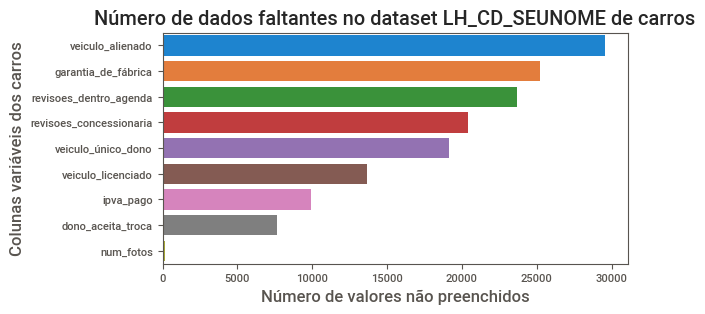

In [178]:
X = train.isna().sum().sort_values(ascending=False)

# Filtering out columns with no missing values
X = X[X > 0]

# Creating the bar plot
plt.figure(figsize=(6, 3))  # Specify the desired figure size here (width, height)
sns.barplot(y=X.index, x=X.values, order=X.index)
plt.xlabel('Número de valores não preenchidos')
plt.ylabel('Colunas variáveis dos carros')
plt.title('Número de dados faltantes no dataset LH_CD_SEUNOME de carros')
plt.show()


In [179]:
train.shape
#Linhas 29584, colunas 29

(29584, 29)

In [180]:
for column in train.columns:
    # Usando value_counts() para contar os valores distintos e mostrar o resultado
    print(train[column].value_counts())

3.007162e+38    1
2.858907e+38    1
1.641513e+38    1
1.046060e+38    1
2.258024e+38    1
               ..
5.194806e+37    1
5.676365e+37    1
3.016097e+38    1
3.163006e+37    1
1.717814e+38    1
Name: id, Length: 29584, dtype: int64
8.0     19420
15.0     2764
16.0     2227
14.0     1811
17.0      985
9.0       728
13.0      717
20.0      286
18.0      248
12.0      147
19.0       45
11.0       21
21.0        5
10.0        3
Name: num_fotos, dtype: int64
VOLKSWAGEN       4594
CHEVROLET        3020
TOYOTA           2180
HYUNDAI          2043
JEEP             2000
FIAT             1918
BMW              1784
AUDI             1698
PEUGEOT          1675
HONDA            1586
MERCEDES-BENZ    1125
FORD             1060
MITSUBISHI        862
LAND ROVER        760
RENAULT           538
NISSAN            438
KIA               408
PORSCHE           349
VOLVO             287
CITROËN           194
TROLLER           177
RAM               168
CHERY             153
JAGUAR            148
MINI      

In [246]:
# Removendo linhas com valores vazios em todas as colunas listadas
train.dropna(subset=['num_fotos', 'marca', 'modelo', 'versao', 'ano_de_fabricacao', 'ano_modelo', 'hodometro',
                     'cambio', 'num_portas', 'tipo', 'cor', 'tipo_vendedor', 'cidade_vendedor',
                     'estado_vendedor', 'anunciante', 'entrega_delivery', 'troca', 'elegivel_revisao'], inplace=True)

Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?</br>
Qual o melhor estado para se comprar uma picape com transmissão automática e por quê?</br>
Qual o melhor estado para se comprar carros que ainda estejam dentro da garantia de fábrica e por quê?</br>

In [235]:
#Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?
media_por_estado = train.groupby('estado_vendedor', as_index=False)['preco'].mean()
media_por_estado['preco'] = media_por_estado['preco'].astype(int)
media_por_estado['preco'] =media_por_estado['preco']/100000000000
media_por_estado

media_por_estado_ordem_decrescente = media_por_estado.sort_values(by='preco', ascending=False)

print(media_por_estado_ordem_decrescente)


             estado_vendedor          preco
7              Maranhão (MA)  121041.689127
0                  Acre (AC)  114683.725409
22              Sergipe (SE)  114012.698831
24            Tocantins (TO)  112448.390606
15                Piauí (PI)  108627.305088
3                 Bahia (BA)  104625.186698
4                 Ceará (CE)  104336.181846
17    Rio Grande do Sul (RS)  104158.502667
11               Paraná (PR)  103934.028810
13                 Pará (PA)  102168.831587
14           Pernambuco (PE)  100691.080335
23            São Paulo (SP)  100267.955736
16  Rio Grande do Norte (RN)   99993.993646
21       Santa Catarina (SC)   99349.763938
2              Amazonas (AM)   99258.173026
18       Rio de Janeiro (RJ)   98310.362210
10         Minas Gerais (MG)   97563.782511
6                 Goiás (GO)   96250.230645
1               Alagoas (AL)   92689.970675
12              Paraíba (PB)   88737.785450
5        Espírito Santo (ES)   88669.437724
8           Mato Grosso (MT)   8

In [183]:
#Qual o melhor estado para se comprar uma picape com transmissão automática e por quê?
# Filtrar apenas os registros com câmbio igual a "automático"
train_filtrado = train.loc[train['cambio'] == 'automático']

# Agrupar por estado e calcular a média do preço


media_por_estado_ordem_decrescente = media_por_estado.sort_values(by='preco', ascending=False, inplace=False)

print(media_por_estado_ordem_decrescente)

         cidade_vendedor          preco
6    Almirante Tamandaré  536459.849207
8               Alvorada  490273.782949
370         Paulo Afonso  450272.363197
205               Gurupi  396559.250866
50              Barbalha  359172.417193
..                   ...            ...
366        Pará de Minas    2832.029429
322        Monte Carmelo    2276.984821
29          Araçariguama    1326.016244
286           Luiz Alves    1061.366136
377             Perdigão     981.550351

[574 rows x 2 columns]


In [236]:
# # Filtrar apenas os registros onde a coluna "garantia_de_fábrica" é diferente de NaN
train_filtrado = train[train['garantia_de_fábrica'].notna()]
# # Supondo que você já tenha importado o pandas e o DataFrame 'train'

# # Agrupar por estado_vendedor e calcular a média do preço
media_por_estado_vendedor = train_filtrado.groupby('estado_vendedor', as_index=False)['preco'].mean()

# # Ordenar o DataFrame pelo preço em ordem decrescente
media_por_estado_vendedor = media_por_estado_vendedor.sort_values(by='preco', ascending=False)

print(media_por_estado_vendedor)

             estado_vendedor         preco
20            Tocantins (TO)  2.430022e+16
0                  Acre (AC)  1.504169e+16
18              Sergipe (SE)  1.259448e+16
12                 Pará (PA)  1.204898e+16
8    Mato Grosso do Sul (MS)  1.142514e+16
3                 Bahia (BA)  1.126614e+16
17       Santa Catarina (SC)  1.113455e+16
10               Paraná (PR)  1.112516e+16
15    Rio Grande do Sul (RS)  1.097969e+16
19            São Paulo (SP)  1.026779e+16
6                 Goiás (GO)  1.014558e+16
7           Mato Grosso (MT)  1.002860e+16
16       Rio de Janeiro (RJ)  1.000878e+16
11              Paraíba (PB)  9.576275e+15
9          Minas Gerais (MG)  9.165725e+15
14  Rio Grande do Norte (RN)  8.834099e+15
1               Alagoas (AL)  8.336154e+15
13           Pernambuco (PE)  7.695018e+15
2              Amazonas (AM)  7.548556e+15
5        Espírito Santo (ES)  6.796960e+15
4                 Ceará (CE)  1.239399e+15


In [185]:
# Obter todas as alternativas únicas na coluna "modelo"
alternativas_modelo = train['modelo'].unique()
print(alternativas_modelo )

['KICKS' 'COMPASS' 'SORENTO' 'AMAROK' 'KORANDO' 'HB20S' 'CIVIC' 'FIT' 'UP'
 'HILUX SW4' 'FIELDER' 'PAJERO TR4' 'Q3' 'C3' 'A3' 'POLO' 'X5' 'ONIX'
 'CAYENNE' 'ECOSPORT' 'EQUINOX' 'PAJERO FULL' 'HR-V' 'CLA 35 AMG' 'WR-V'
 'X6' 'A 200' 'T4' 'V60' 'COROLLA' 'RX350 F-SPORT' 'ASX' 'LANCER' 'TIGUAN'
 'SAVEIRO' '208' 'GOLF' 'KANGOO' 'C 180' 'IX35' 'CRUZE' 'RENEGADE'
 'STRADA' 'M3' 'A5' 'FIORINO' '320i' 'CRV' 'TRACKER' 'TORO' 'RAV4'
 'COOPER' 'RANGE ROVER EVOQUE' 'VIRTUS' 'M5' 'JETTA' '2008'
 'RANGE ROVER SPORT' 'SPIN' 'CLS 350' 'GLA 200' 'GOL' 'VOYAGE'
 'COUNTRYMAN' 'TIGGO 2' 'DISCOVERY SPORT' 'HILUX' 'RANGER' 'PALIO' 'FOX'
 'A4' 'MONTANA' 'YARIS' 'RANGE ROVER VELAR' 'MACAN' 'T-CROSS' 'S60'
 'CLASSIC' 'DUSTER' 'TERRITORY' 'TUCSON' 'CADENZA' 'PRISMA' 'JOY'
 'CAPTIVA' 'CERATO' 'CRONOS' 'KA' 'SPRINTER' 'FRONTIER' 'C 180 K' 'HB20'
 'NEW BEETLE' 'SANDERO' 'A6' 'DOBLÒ' 'CRETA' 'S10' '328i' 'MASTER'
 'SPORTAGE' 'XC60' 'VERSA' 'L200 TRITON' 'CLIO' 'DISCOVERY' 'FUSCA'
 'C 250' 'CT200H' 'GLK 220' 'ELANTR

In [186]:
train.shape
#Linhas 29584 passou a ter 29407, colunas 29

(29407, 29)

In [187]:
!pip install tabulate
#BVariáveis nominais
from tabulate import tabulate

# Supondo que 'train' é o seu DataFrame

# Obtendo a descrição das variáveis nominais
describe_nominais = train.describe(include='O')

# Exibindo o resultado em uma tabela
print(tabulate(describe_nominais, headers='keys', tablefmt='pretty'))

+--------+------------+---------+----------------------------------------+------------+-------+----------+--------+---------------+-----------------+-----------------+---------------+-------------------+--------------------+----------------------------------------------+-----------+--------------------+---------------------+-----------------------------------------------+
|        |   marca    | modelo  |                 versao                 |   cambio   | tipo  | blindado |  cor   | tipo_vendedor | cidade_vendedor | estado_vendedor |  anunciante   | dono_aceita_troca | veiculo_único_dono |           revisoes_concessionaria            | ipva_pago | veiculo_licenciado | garantia_de_fábrica |            revisoes_dentro_agenda             |
+--------+------------+---------+----------------------------------------+------------+-------+----------+--------+---------------+-----------------+-----------------+---------------+-------------------+--------------------+--------------------------

In [188]:
# Calculando as estatísticas para a variável "hodometro"
estatisticas_hodometro = train['hodometro'].describe()

# Criando um DataFrame para armazenar as estatísticas
tabela_hodometro = pd.DataFrame(estatisticas_hodometro)

# Exibindo o DataFrame em formato de tabela
print(tabulate(tabela_hodometro, headers='keys', tablefmt='pretty'))

+-------+-------------------+
|       |     hodometro     |
+-------+-------------------+
| count |      29407.0      |
| mean  | 58578.24827422042 |
|  std  | 32581.28101776799 |
|  min  |       100.0       |
|  25%  |      31316.5      |
|  50%  |      57707.0      |
|  75%  |      82095.5      |
|  max  |     390065.0      |
+-------+-------------------+


In [189]:
# Calculando as estatísticas para a variável "preco"
estatisticas_preco = train['preco'].describe()

# Criando um DataFrame para armazenar as estatísticas
tabela_preco = pd.DataFrame(estatisticas_preco)

# Exibindo o DataFrame em formato de tabela
print(tabulate(tabela_preco, headers='keys', tablefmt='pretty'))

+-------+-----------------------+
|       |         preco         |
+-------+-----------------------+
| count |        29407.0        |
| mean  | 1.002983822787313e+16 |
|  std  |  9564310495134626.0   |
|  min  |     20062921479.0     |
|  25%  |  3202475009355035.0   |
|  50%  |  8241621892869420.0   |
|  75%  | 1.342557039370815e+16 |
|  max  | 6.54991187114168e+16  |
+-------+-----------------------+


b) Gráficos:</br>

Plote gráficos adequados para cada variável numérica, como histogramas, boxplots ou densidade de distribuição. Esses gráficos fornecerão insights visuais sobre a distribuição dos dados, a presença de outliers e padrões.

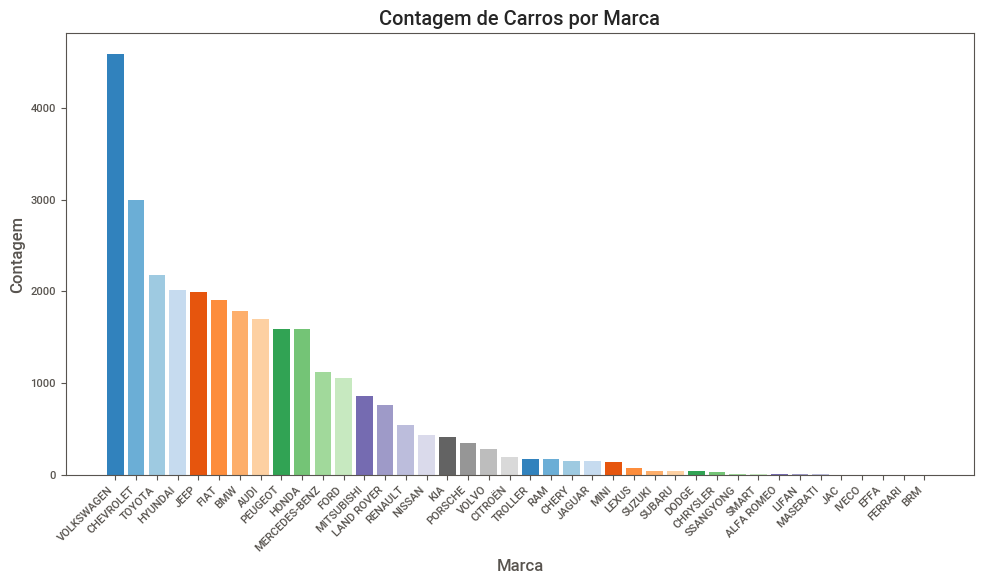

In [190]:
# Contagem das ocorrências de cada marca
contagem_marcas = train['marca'].value_counts()

# Obtendo as marcas únicas em ordem de contagem decrescente
marcas_unicas = contagem_marcas.index

# Definindo cores diferentes para as barras com base no número de marcas
cores = plt.cm.tab20c.colors[:len(marcas_unicas)]

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))  # Define o tamanho da figura do gráfico (largura, altura)
plt.bar(marcas_unicas, contagem_marcas, color=cores)
plt.xlabel('Marca')
plt.ylabel('Contagem')
plt.title('Contagem de Carros por Marca')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor visualização
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de rótulos
plt.show()



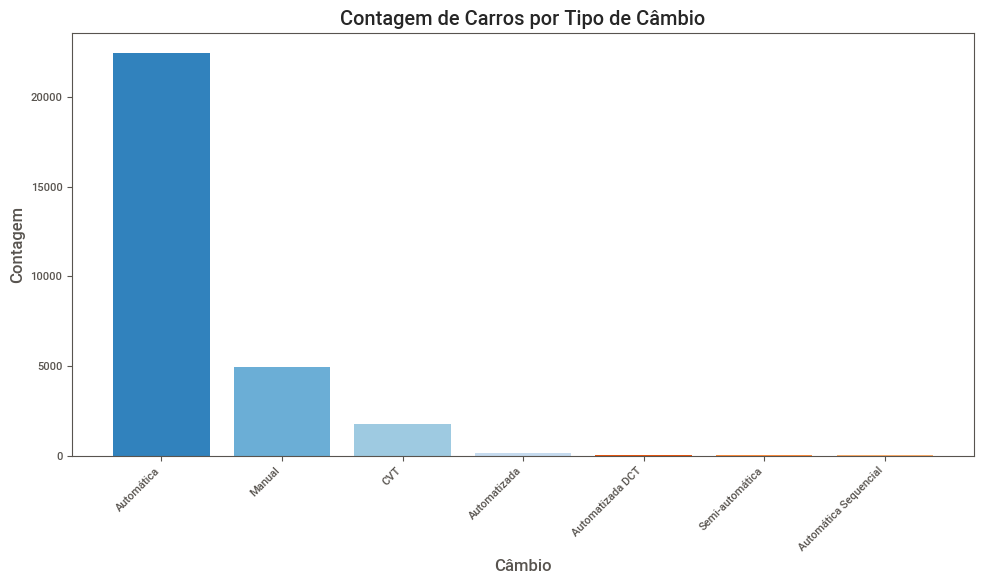

In [191]:
# Contagem das ocorrências de cada tipo de câmbio
contagem_cambio = train['cambio'].value_counts()

# Obtendo os tipos de câmbio únicos em ordem de contagem decrescente
cambio_unicos = contagem_cambio.index

# Definindo cores diferentes para as barras com base no número de tipos de câmbio
cores_cambio = plt.cm.tab20c.colors[:len(cambio_unicos)]

# Plotando o gráfico de barras para os tipos de câmbio
plt.figure(figsize=(10, 6))  # Define o tamanho da figura do gráfico (largura, altura)
plt.bar(cambio_unicos, contagem_cambio, color=cores_cambio)
plt.xlabel('Câmbio')
plt.ylabel('Contagem')
plt.title('Contagem de Carros por Tipo de Câmbio')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor visualização
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de rótulos
plt.show()


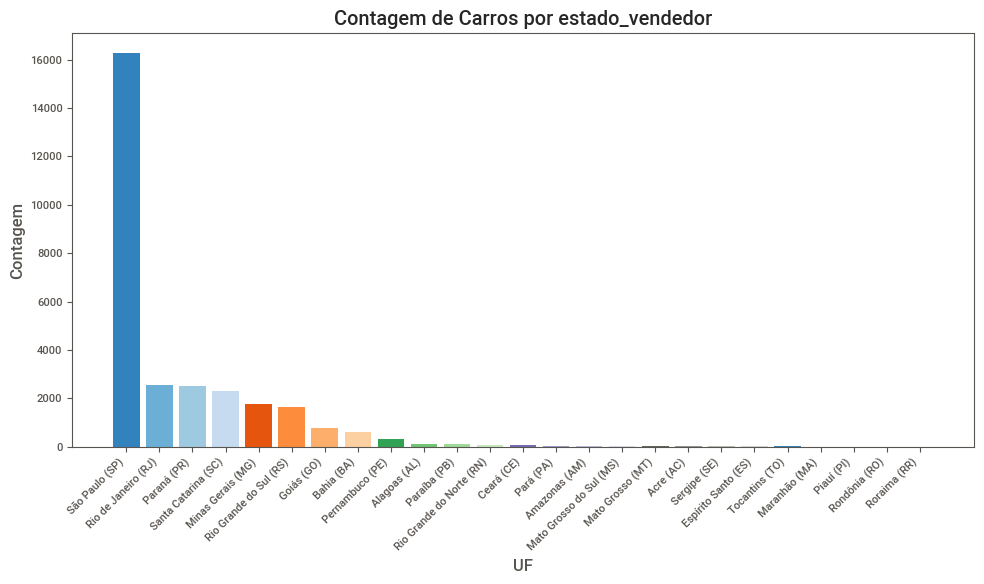

In [237]:
# Contagem das ocorrências de cada marca
contagem_UF = train['estado_vendedor'].value_counts()

# Obtendo as marcas únicas em ordem de contagem decrescente
UF_unicas = contagem_UF.index

# Definindo cores diferentes para as barras com base no número de marcas
cores = plt.cm.tab20c.colors[:len(UF_unicas)]

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))  # Define o tamanho da figura do gráfico (largura, altura)
plt.bar(UF_unicas, contagem_UF, color=cores)
plt.xlabel('UF')
plt.ylabel('Contagem')
plt.title('Contagem de Carros por estado_vendedor')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor visualização
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de rótulos
plt.show()

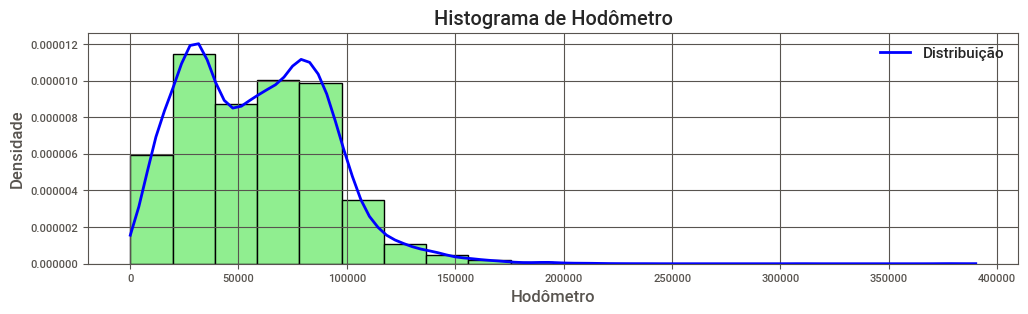

In [193]:
from scipy.stats import gaussian_kde

# Plotando o histograma da variável "hodometro"
plt.figure(figsize=(12, 3))  # Define o tamanho da figura do gráfico (largura, altura)
plt.hist(train['hodometro'], bins=20, color='lightgreen', edgecolor='black', density=True)
plt.xlabel('Hodômetro')
plt.ylabel('Densidade')
plt.title('Histograma de Hodômetro')

# Estimando a densidade da distribuição
densidade = gaussian_kde(train['hodometro'])
hodometro_min = train['hodometro'].min()
hodometro_max = train['hodometro'].max()
hodometro_range = np.linspace(hodometro_min, hodometro_max, 100)  # Gera valores para a linha da distribuição
plt.plot(hodometro_range, densidade(hodometro_range), color='blue', linewidth=2, label='Distribuição')

plt.legend()  # Mostra a legenda com o rótulo da distribuição

plt.grid(True)  # Adiciona grades no gráfico

plt.show()


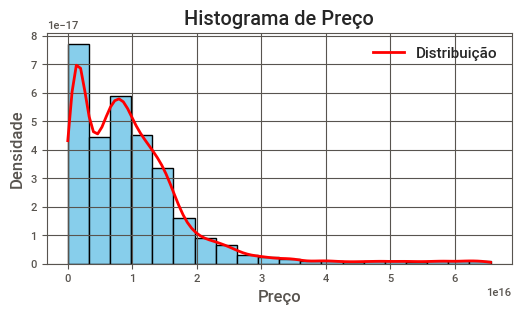

In [194]:
# Plotando o histograma da variável "preco"
plt.figure(figsize=(6, 3))  # Define o tamanho da figura do gráfico (largura, altura)
plt.hist(train['preco'], bins=20, color='skyblue', edgecolor='black', density=True)
plt.xlabel('Preço')
plt.ylabel('Densidade')
plt.title('Histograma de Preço')

# Estimando a densidade da distribuição
densidade = gaussian_kde(train['preco'])
preco_min = train['preco'].min()
preco_max = train['preco'].max()
preco_range = np.linspace(preco_min, preco_max, 100)  # Gera valores para a linha da distribuição
plt.plot(preco_range, densidade(preco_range), color='red', linewidth=2, label='Distribuição')

plt.legend()  # Mostra a legenda com o rótulo da distribuição
plt.grid(True)  # Adiciona grades no gráfico
plt.show()


c) Correlações: </br>

Calcule a matriz de correlação entre as variáveis numéricas. Isso permitirá identificar relações lineares entre as features e a variável alvo "preco".

In [195]:
# Selecionando apenas as variáveis numéricas
variaveis_numericas = train.select_dtypes(include='number')

# Calculando a matriz de correlação
matriz_correlacao = variaveis_numericas.corr()

# Exibindo a matriz de correlação
print(matriz_correlacao)

                         id  num_fotos  ano_de_fabricacao  ano_modelo  \
id                 1.000000  -0.003772          -0.006258   -0.000994   
num_fotos         -0.003772   1.000000           0.029702    0.032821   
ano_de_fabricacao -0.006258   0.029702           1.000000    0.859698   
ano_modelo        -0.000994   0.032821           0.859698    1.000000   
hodometro         -0.002707   0.027550          -0.727464   -0.789745   
num_portas        -0.004590   0.011245           0.080241    0.073631   
veiculo_alienado        NaN        NaN                NaN         NaN   
preco              0.006298  -0.005224           0.014482    0.014694   

                   hodometro  num_portas  veiculo_alienado     preco  
id                 -0.002707   -0.004590               NaN  0.006298  
num_fotos           0.027550    0.011245               NaN -0.005224  
ano_de_fabricacao  -0.727464    0.080241               NaN  0.014482  
ano_modelo         -0.789745    0.073631               NaN

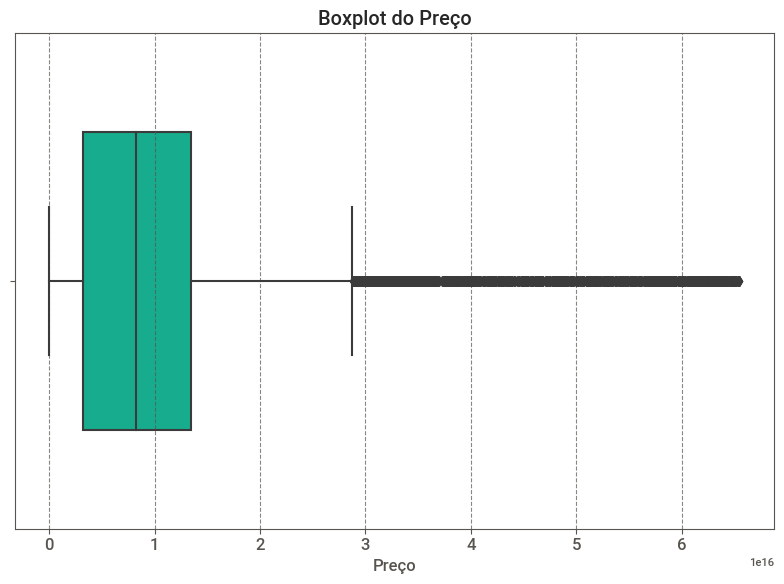

In [196]:
# Selecionando apenas a variável numérica 'hodometro'
preco= train['preco']

# Definindo cores personalizadas para o boxplot
cor_boxplot_preco = '#00c49D'

# Criando o boxplot estilizado do hodômetro
plt.figure(figsize=(8, 6))  # Define o tamanho da figura do gráfico (largura, altura)
sns.boxplot(x=preco, color=cor_boxplot_preco, orient='h', width=0.6)
plt.xlabel('Preço')
plt.title('Boxplot do Preço')
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Adiciona linhas de grade no eixo x
plt.xticks(fontsize=12)  # Ajusta o tamanho dos rótulos do eixo x
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos
plt.show()

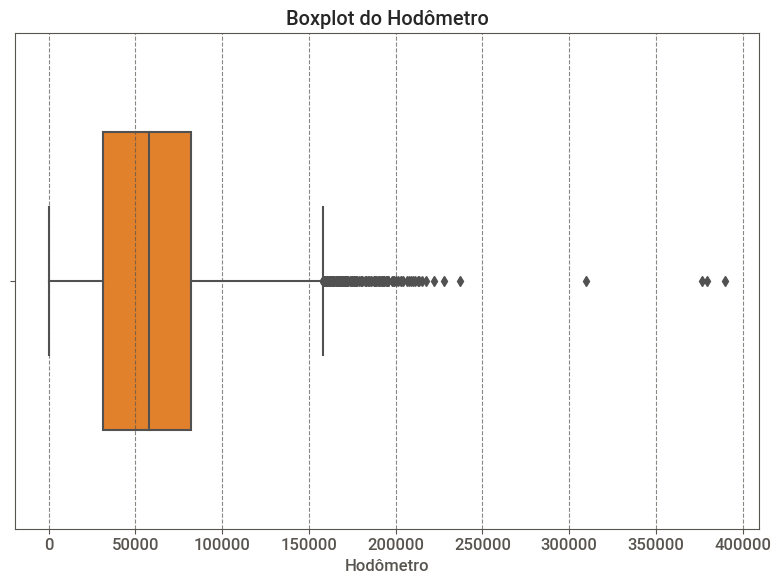

In [197]:
# Selecionando apenas a variável numérica 'hodometro'
hodometro = train['hodometro']

# Definindo cores personalizadas para o boxplot
cor_boxplot_hodo = '#ff7f0e'

# Criando o boxplot estilizado do hodômetro
plt.figure(figsize=(8, 6))  # Define o tamanho da figura do gráfico (largura, altura)
sns.boxplot(x=hodometro, color=cor_boxplot_hodo, orient='h', width=0.6)
plt.xlabel('Hodômetro')
plt.title('Boxplot do Hodômetro')
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Adiciona linhas de grade no eixo x
plt.xticks(fontsize=12)  # Ajusta o tamanho dos rótulos do eixo x
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos
plt.show()

Hipôteses: </br>
Hipótese 1: As variáveis preço pode está relacionada com a quilometragem.</br>
Hipótese 2: A variável câmbio automático pode estar relacionada com quilometragem e preço de venda.</br>
Hipótese 2: Carros mais antigos podem estar relacionados com o preço de venda.


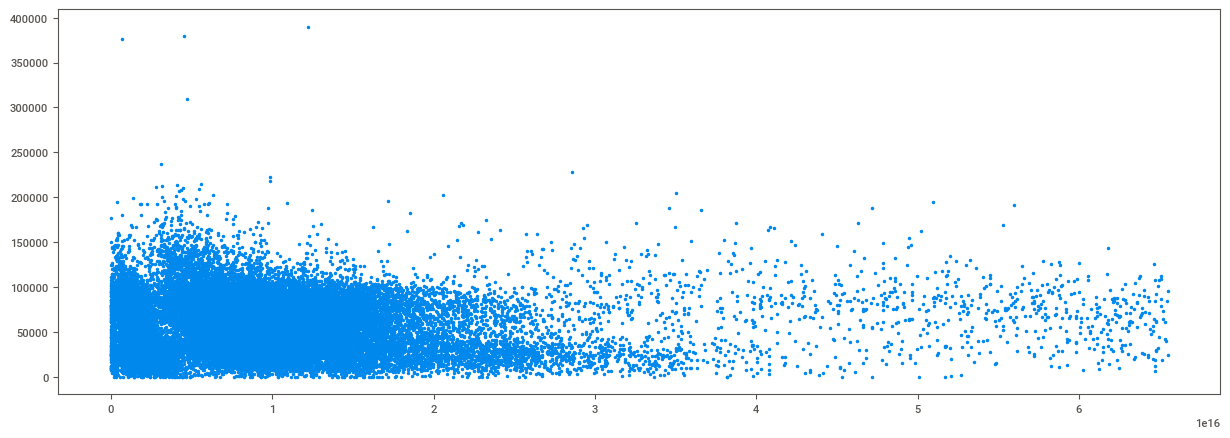

In [198]:
#dispersao preço e quilometragem
plt.figure(figsize=(15,5))
plt.plot(train.preco,train.hodometro, '.')

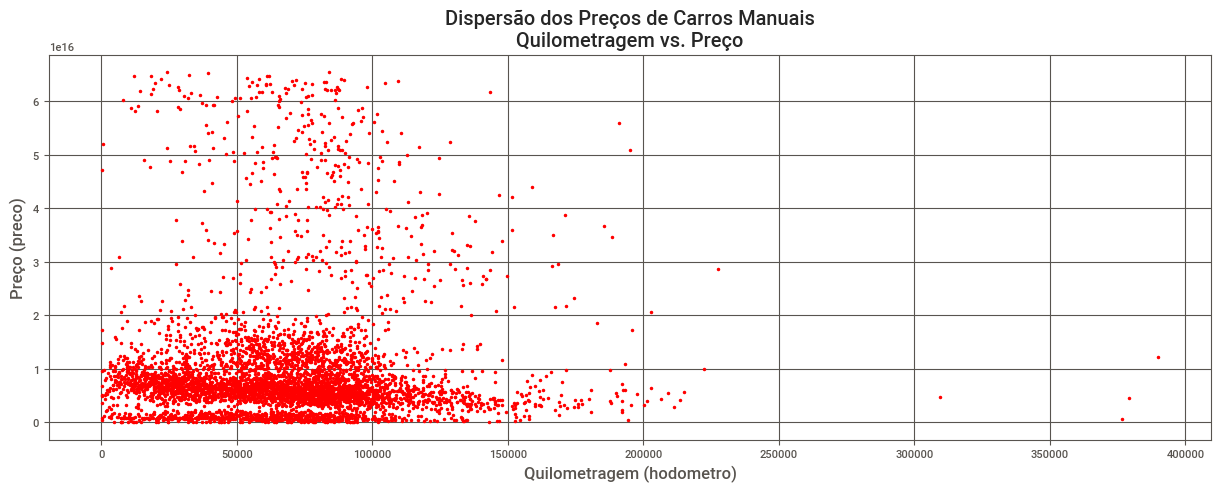

In [199]:
# Supondo que 'train' é o seu conjunto de dados
plt.figure(figsize=(15, 5))

# Plotando a dispersão dos preços de carros com transmissão manual em relação à quilometragem
# Usando pontos vermelhos ('.') para representar os dados
plt.plot(train.loc[train.cambio == 'Manual', 'hodometro'], train.loc[train.cambio == 'Manual', 'preco'], '.', color='red')

# Adicionando etiqueta para o eixo x
plt.xlabel('Quilometragem (hodometro)')

# Adicionando etiqueta para o eixo y
plt.ylabel('Preço (preco)')

# Adicionando título ao gráfico
plt.title('Dispersão dos Preços de Carros Manuais\nQuilometragem vs. Preço')

# Habilitando as grades para melhor visualização dos dados
plt.grid(True)

# Exibindo o gráfico na tela
plt.show()


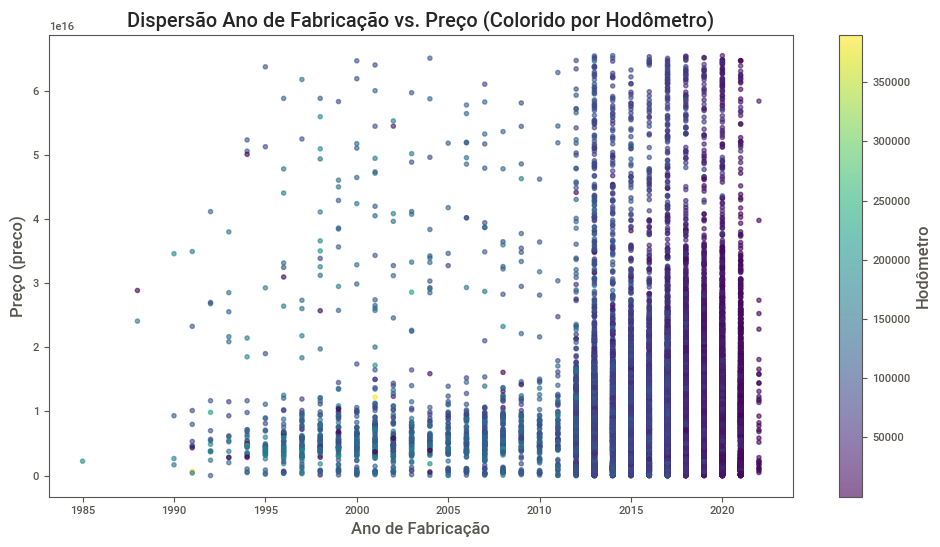

In [200]:
# Supondo que 'train' é o seu DataFrame
plt.figure(figsize=(12, 6))

# Plotando o gráfico de dispersão
plt.scatter(train['ano_de_fabricacao'], train['preco'], c=train['hodometro'], cmap='viridis', alpha=0.6)

# Adicionando etiqueta para o eixo x
plt.xlabel('Ano de Fabricação')

# Adicionando etiqueta para o eixo y
plt.ylabel('Preço (preco)')

# Adicionando título ao gráfico
plt.title('Dispersão Ano de Fabricação vs. Preço (Colorido por Hodômetro)')

# Adicionando uma barra de cores para representar o hodômetro (quanto mais escuro, maior a quilometragem)
cbar = plt.colorbar()
cbar.set_label('Hodômetro')

# Exibindo o gráfico na tela
plt.show()


<Axes: >

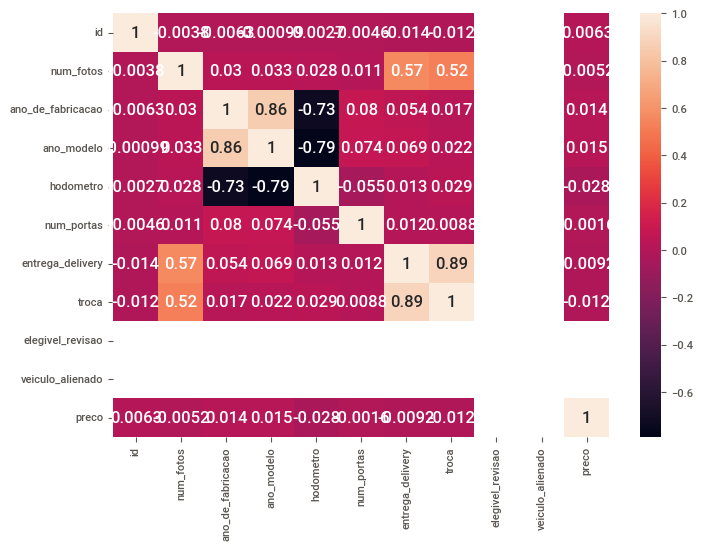

In [201]:
sns.heatmap(train.corr (), annot = True )

Respostas às Perguntas de Negócio:</br>

a) Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?</br>

Resposta: Analise as estatísticas de preços e a demanda por carros de marca popular em cada estado. O melhor estado será aquele em que os carros desse tipo têm preços mais altos e/ou são vendidos mais rapidamente.</br>
b) Qual o melhor estado para se comprar uma picape com transmissão automática e por quê?</br>

Resposta: Analise as estatísticas de preços e a disponibilidade de picapes com transmissão automática em cada estado. O melhor estado será aquele em que esses veículos têm preços mais baixos e/ou são mais facilmente encontrados no mercado.
c) Qual o melhor estado para se comprar carros que ainda estejam dentro da garantia de fábrica e por quê?</br>

Resposta: Analise as estatísticas de preços e a oferta de carros com garantia de fábrica em cada estado. O melhor estado será aquele em que esses carros têm preços mais baixos e/ou são mais abundantes no mercado.</br>


######Mapa

#Tratando a variável

In [262]:
# Renomear coluna para 'NM_ESTADO' em letras maiúsculas
train.rename(columns={'estado_vendedor': 'NM_ESTADO'}, inplace=True)
# Remover as quatro últimas letras da coluna 'NM_ESTADO'
train['NM_ESTADO'] = train['NM_ESTADO'].str.slice(stop=-4).str.upper()
train['NM_ESTADO']

0             SAO PAULO 
1          MINAS GERAIS 
2             SAO PAULO 
3             SAO PAULO 
4        RIO DE JANEIRO 
              ...       
29579             GOIAS 
29580            PARANA 
29581             BAHIA 
29582         SAO PAULO 
29583         SAO PAULO 
Name: NM_ESTADO, Length: 29584, dtype: object

In [263]:
#ESTADO PREÇO
media_por_estado = train.groupby('NM_ESTADO')['preco'].mean()

media_por_estado = train.groupby('NM_ESTADO', as_index=False)['preco'].mean()
media_por_estado['preco'] = media_por_estado['preco'].astype(int)
media_por_estado['preco'] =media_por_estado['preco']/100000000000
media_por_estado

NM_ESTADO          preco
0                  ACRE   114683.725409
1               ALAGOAS    92819.191291
2              AMAZONAS    99258.173026
3                 BAHIA   104465.679742
4                 CEARA   104336.181846
5        ESPIRITO SANTO    88669.437724
6                 GOIAS    96036.871018
7              MARANHAO   121041.689127
8           MATO GROSSO    86656.296179
9    MATO GROSSO DO SUL    77928.295010
10         MINAS GERAIS    97721.931123
11                 PARA   100791.334985
12              PARAIBA    88737.785450
13               PARANA   103886.130987
14           PERNAMBUCO   100691.080335
15                PIAUI   108546.223954
16       RIO DE JANEIRO    98242.035706
17  RIO GRANDE DO NORTE    99993.993646
18    RIO GRANDE DO SUL   104158.502667
19             RONDONIA    33143.907028
20              RORAIMA    63613.691193
21       SANTA CATARINA    99349.763938
22            SAO PAULO   100167.669518
23              SERGIPE   114012.698831
24            TOCANTINS   112448.390606

Previsão do Preço: </br>

Para prever o preço dos carros, você pode usar técnicas de regressão, pois estamos resolvendo um problema de previsão numérica contínua. Algumas variáveis importantes a serem consideradas para a previsão do preço podem incluir: ano de fabricação, quilometragem, marca, modelo, tipo de veículo, estado de conservação, entre outras.</br>

Pode-se experimentar diferentes modelos de regressão, como regressão linear, regressão por floresta aleatória, regressão de gradient boosting, ou modelos mais avançados, como redes neurais.</br>

Avaliado o desempenho do modelo usando métricas de regressão, como o erro médio absoluto (MAE) ou o erro quadrático médio (MSE). Escolha a métrica mais adequada com base na escala dos dados e no objetivo de negócio. </br>

Finalmente, gerar o arquivo "predição" com as previsões de preço para o conjunto dde dados e compartilhar os resultados com o cliente. </br>



Utilizando as variáveis (features), faça um relatório com uma análise das principais estatísticas da base de dados. Descreva graficamente essas variáveis (features), apresentando as suas principais estatísticas descritivas. Comente o porquê da escolha destas estatísticas e o que elas nos informam.</br>
Faça uma EDA. Nesta EDA, crie e responda 3 hipóteses de negócio. Além disso,  responda também às seguintes perguntas de negócio:</br>
Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?</br>
Qual o melhor estado para se comprar uma picape com transmissão automática e por quê?</br>
Qual o melhor estado para se comprar carros que ainda estejam dentro da garantia de fábrica e por quê?</br>
Explique como você faria a previsão do preço a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? </br>Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?</br>
Envie o resultado final do modelo em uma planilha com apenas duas colunas (id, preco). </br>
A entrega deve ser feita através de um repositório de código público que contenha:</br>
README explicando como instalar e executar o projeto
Arquivo de requisitos com todos os pacotes utilizados e suas versões
Relatórios das análises estatísticas e EDA em PDF, Jupyter Notebook ou semelhante conforme passo 1 e 2.
Códigos de modelagem utilizados no passo 3. </br>
Arquivo final com o nome predicted.csv conforme passo 4 acima. </br>
Todos os códigos produzidos devem seguir as boas práticas de codificação.


In [7]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# Read the data
df_train = pd.read_excel("/content/drive/MyDrive/train.xlsx")
df_test = pd.read_excel("/content/drive/MyDrive/test.xlsx")

# Prepare the data
x = df_train[['ano_de_fabricacao', 'ano_modelo', 'hodometro', 'num_portas']]
y = df_train['preco']
z = df_test[['ano_de_fabricacao', 'ano_modelo', 'hodometro', 'num_portas']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# Optionally, scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Linear Regression model
linear_regression = LinearRegression()
linear_regression.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = linear_regression.predict(X_test_scaled)

# Evaluate the model
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

#comenta e roda o print(logistic_regression.coef_) como primeiro step, depois descomenta, analisa e roda: y_pred = logistic_regression.predict(z)
y_pred = logistic_regression.predict(z)


Mean Absolute Error: 6415761724982024.0
Mean Squared Error: 8.762770864467052e+31
R-squared: -0.00047395460785271126


In [5]:
print(logistic_regression.coef_)


[[-2.64870632e-04 -2.65046396e-04  9.28761298e-05 -4.83217841e-07]
 [-5.54759436e-04 -5.55773872e-04  1.09659390e-04 -1.04358867e-06]
 [-2.96809487e-04 -2.97604166e-04  9.50699292e-05 -5.43187796e-07]
 ...
 [-4.10758107e-04 -4.10457539e-04  1.01261916e-04 -7.63023154e-07]
 [ 5.34325202e-04  5.34662658e-04  1.30306720e-05  1.07498758e-06]
 [-5.78088331e-04 -5.79124544e-04  1.10886253e-04 -1.09018019e-06]]


In [9]:
print(y_pred)

[ 2613242805232540  5493514511507020  2613242805232540 ...
  2613242805232540 15824075142946500  2613242805232540]
